<font size=6, font color=blue>**PA005: Customer Clustering**

# Solution Planning

## Input

- Business Problem
    * Select most valuable customers to create a loyalty program called Insiders


- Data
    * One year of e-commerce sales

## Output

* A list of customers that will be part of Insiders
* A report answering business questions
    1. Who are the eligible customers to participate in the Insiders program? 
    2. How many customers will be part of the program?
    3. What are the main characteristics of these customers? 
    4. What revenue percentage comes from Insiders?
    5. What is the Insiders' expected revenue for the coming months?
    6. What are the conditions for a customer to be eligible for the Insiders program? 
    7. What are the conditions for a customer to be removed from the Insiders program?
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
    9. What actions can the marketing team make to increase the revenue?

## Tasks

* A report answering business questions:
    1. Who are the eligible customers to participate in the Insiders program?
        - Understand the criteria to a eligible customer. 
        - Criteria examples:
            * Revenue
                * High average ticket
                * High LTV (lifetime value)
                * Low recency
                * High basket size
                * Low churn probability
            * Expenses
                * Return rate
            * Buying Experience
                * High average notes on reviews<br><br>
                
    2. How many customers will be part of the program?
        - Calculate the percentage of customers that belong to Insiders program over the total number of customers.<br><br>
                
    3. What are the main characteristics of these customers? 
        - Indicate customer characteristics:
            * Age
            * City
            * Education level
            * Localization, etc.
        - Indicate consumption characteristics:
            * Clusters attributes<br><br>
                
    4. What revenue percentage comes from Insiders?
        - Calculate the percentage of Insiders revenue over the total revenue.<br><br>
                
    5. What is the Insiders' expected revenue for the coming months?
        - Calculate Insiders' LTV
        - Calculate Cohort Analysis.<br><br>
        
    6. What are the conditions for a customer to be eligible for the Insiders program? 
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be similar to a customer on Insiders.<br><br>
                
    7. What are the conditions for a customer to be removed from the Insiders program?
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be dissimilar to a customer on Insiders.<br><br>
            
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
        - Perform A/B Test
        - Perform A/B Bayesian Test  
        - Perform Hypothesis Test <br><br>
                        
    9. What actions can the marketing team make to increase the revenue?
        - Discount
        - Buying preferences
        - Shipping options
        - Promote a visit to the company, etc.

* Solution Benchmark
    - Desk Research <br>
        <font color=red>* INSERIR EXEMPLOS APLICADOS NO MERCADO </font><br>
        * 

# Imports

In [1]:
import numpy       as np
import pandas      as pd
import seaborn     as sns
import umap.umap_  as umap
import regex       as re

from IPython.core.display  import HTML
from matplotlib            import pyplot           as plt
from plotly                import express          as px

from sklearn               import cluster          as c
from sklearn               import metrics          as m
from sklearn               import preprocessing    as pp
from yellowbrick.cluster   import KElbowVisualizer, SilhouetteVisualizer 

## Helper Functions

In [2]:
def personal_settings():
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)
        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [3]:
personal_settings()

## Load Dataset

In [4]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv')

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN


In [6]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [7]:
df2 = df_raw.copy()

## Rename Columns

In [8]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df2.columns = cols_new
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Data Dimensions

In [10]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of cols: {}'.format(df2.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [11]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [12]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Check NA

In [13]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [14]:
# # c01 - removing NA
# df2 = df2.dropna(subset=['description','customer_id'])
# print ('Removed data: {:.2f}'.format(1 - df2.shape[0]/df_raw.shape[0]))

In [15]:
# c.04 - checking if there is the same 'invoice_no' with and without 'customer_id'
df_missingID = df2.loc[df2['customer_id'].isna(),:]
df_notmissingID = df2.loc[~df2['customer_id'].isna(),:]

print("Number of transitions without 'customer_id':", df_missingID.shape[0])
print("Number of transitions with 'customer_id':", df_notmissingID.shape[0], "\n\n")

# creating a list of 'invoice_no' that doesn't have 'customer_id'
missingID_invoice = df_missingID['invoice_no'].drop_duplicates().tolist()

# checking values from 'missingID_invoice' in 'df_missingID' dataset
print("Checking if there is 'invoice_no' from dataset without 'customer_id' on the dataset that has 'customer_id':")
print( df_notmissingID.loc[df_notmissingID['invoice_no'].isin(missingID_invoice),:] )
print("\nNo values found")

Number of transitions without 'customer_id': 135080
Number of transitions with 'customer_id': 406829 


Checking if there is 'invoice_no' from dataset without 'customer_id' on the dataset that has 'customer_id':
Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id, country]
Index: []

No values found


In [16]:
# c.04 - creating new 'customer_id'

# creating reference
df_invoices_noID = pd.DataFrame(df_missingID['invoice_no'].drop_duplicates())
df_invoices_noID['new_customer_id'] = np.arange(19000, 19000+len(df_invoices_noID), 1)
df_invoices_noID.head()

# merging original (df2) with reference (df_invoices_noID)
df2 = pd.merge(df2, df_invoices_noID, on='invoice_no', how='left')

# combining the id's columns and dropping 'new_customer_id' column
df2['customer_id'] = df2['customer_id'].combine_first(df2['new_customer_id'])
df2 = df2.drop(columns=['new_customer_id'], axis=1)
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


In [17]:
df2.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
customer_id        0
country            0
dtype: int64

## Change dtypes

In [18]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [19]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


In [20]:
# changing 'invoice_date'
df2['invoice_date'] = pd.to_datetime (df2['invoice_date'], format='%d-%b-%y')
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.00,United Kingdom


In [21]:
# changing 'customer_id'
df2['customer_id'] = df2['customer_id'].astype('int64')

In [22]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [23]:
num_df2 = df2.select_dtypes(include=['int64','float64'])
cat_df2 = df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Numerical Attributes

In [24]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df2.apply(np.mean)).T
ct2 = pd.DataFrame(num_df2.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df2.apply(np.std)).T
d2 = pd.DataFrame(num_df2.apply(min)).T
d3 = pd.DataFrame(num_df2.apply(max)).T
d4 = pd.DataFrame(num_df2.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df2.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df2.apply(lambda x: x.kurtosis())).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.00,161990.00,9.55,3.00,218.08,-0.26,119769.16
1,unit_price,-11062.06,38970.00,50032.06,4.61,2.08,96.76,186.51,59005.72
2,customer_id,12346.00,22709.00,10363.00,16688.84,16249.00,2911.41,0.49,-0.80


### <font color=red>Numerical Attributes Investigation

In [25]:
# Negative 'quantity' means devolution?

# 'unit_price' equals 0 means promotion?

## Categorical Attributes

In [26]:
cat_df2.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [27]:
# === 'invoice_no' 

# checking 'invoice_no' that have at least one letter
invoice_no_oneletter = df2.loc[df2['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))),:]
print('Number of invoices that have at least one letter:', invoice_no_oneletter.shape[0])
print('Number of invoices that have at least one letter and have NEGATIVE "quantity":', invoice_no_oneletter[invoice_no_oneletter['quantity']<0].shape[0],'\n')
print('Therefore, all invoices that have at least one letter can be a return.')

Number of invoices that have at least one letter: 9291
Number of invoices that have at least one letter and have NEGATIVE "quantity": 9288 

Therefore, all invoices that have at least one letter can be a return.


In [28]:
# === 'stock_code'

# checking 'stock_code' that have at least ONE letter
stockcode_oneletter = df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('[^0-9]+', x))),:]
print('Number of stock codes that have at least one letter:', stockcode_oneletter.shape[0])
print('Number of stock codes that have at least one letter and have NEGATIVE "quantity":', stockcode_oneletter[stockcode_oneletter['quantity']<0].shape[0],'\n')

# checking 'stock_code' that have ONLY letters
stockcode_onlyletters = df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))),:]
print('\nNumber of stock codes that have only letters:', stockcode_onlyletters.shape[0])
print('Unique values of stock codes that have only letters:\n', stockcode_onlyletters['stock_code'].unique())
print('Unique values of "description" from stock codes that have only letters:\n', stockcode_onlyletters['description'].unique())

# next cycle, remove stockcode_onlyletters

Number of stock codes that have at least one letter: 54873
Number of stock codes that have at least one letter and have NEGATIVE "quantity": 1637 


Number of stock codes that have only letters: 2759
Unique values of stock codes that have only letters:
 ['POST' 'D' 'DOT' 'M' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY' 'DCGSSGIRL' 'PADS'
 'B' 'CRUK']
Unique values of "description" from stock codes that have only letters:
 ['POSTAGE' 'Discount' 'DOTCOM POSTAGE' 'Manual' 'SAMPLES' 'AMAZON FEE' nan
 'BOYS PARTY BAG' 'GIRLS PARTY BAG' 'PADS TO MATCH ALL CUSHIONS'
 'Adjust bad debt' 'CRUK Commission']


In [29]:
# === 'country'
print('Unique countries:', df2['country'].unique().shape[0])
df2['country'].value_counts(normalize=True).head()

Unique countries: 38


United Kingdom   0.91
Germany          0.02
France           0.02
EIRE             0.02
Spain            0.00
Name: country, dtype: float64

# Variable Filtering

In [30]:
df3 = df2.copy()
df3.head(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom


In [31]:
# 'stock_code' is not only letters
df3 = df3.loc[~df3['stock_code'].isin(stockcode_onlyletters['stock_code'].unique())]

# 'description'
df3 = df3.drop(columns='description', axis=1)

# 'unit_price' > 0.0
df3 = df3.loc[df3['unit_price']>=0.04,:]

# country
df3 = df3[~df3['country'].isin(['European Community', 'Unspecified'])]

# 'quantity' is negative/positive
df3_returns = df3.loc[df3['quantity']<0,:]
df3_purchases = df3.loc[df3['quantity']>0,:]

# Feature Engineering

In [135]:
df4 = df3.copy()

## Feature Creation

In [136]:
# data reference
df_ref = df4.drop(['invoice_no','stock_code', 'quantity','invoice_date','unit_price','country'],
                  axis=1).drop_duplicates(ignore_index=True)
print('Data reference shape:', df_ref.shape)
df_ref.head()

Data reference shape: (5787, 1)


,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


### Gross Revenue

In [137]:
# === GROSS REVENUE - how much each 'customer_id' spent (quantity*price)

# gross revenue = quantity * price
df3_purchases.loc[:,'gross_revenue'] = df3_purchases.loc[:,'quantity']*df3_purchases.loc[:,'unit_price']
df_monetary = df3_purchases.loc[:,['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

# --- Note
# The 91 NA refers to customers that only returned something
# This can happen due to the date range on the dataset

C:\Users\Mariana\Documents\anaconda3\envs\pa005_customerclustering\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    91
dtype: int64

### Recency 

In [138]:
# === RECENCY - last day of purchase of each 'customer_id'

# selecting last 'invoice_date' by 'customer_id'
df_recency = df3_purchases.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### Quantity of baskets

In [139]:
# === QUANTITY OF BASKETS - number of purchases per 'customer_id'

# grouping 'invoice_no' by 'customer_id'
df_qty_baskets = df3_purchases.loc[:, ['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_qty_baskets = df_qty_baskets.rename(columns={'customer_id': 'customer_id','invoice_no': 'qty_baskets'}) # changing columns names
df_qty_baskets.head()

# merging dataframes
df_ref = pd.merge(df_ref, df_qty_baskets, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    91
recency_days     91
qty_baskets      91
dtype: int64

### Quantity of Items

In [140]:
# === QUANTITY OF ITEMS - sum of number of produts per 'customer_id'

# grouping 'quantity' by 'customer_id'
df_qty_items = df3_purchases.loc[:, ['customer_id','quantity']].groupby('customer_id').sum().reset_index()
df_qty_items = df_qty_items.rename(columns={'customer_id': 'customer_id','quantity': 'qty_items'}) # changing columns names
df_qty_items.head()

# merging dataframes
df_ref = pd.merge(df_ref, df_qty_items, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    91
recency_days     91
qty_baskets      91
qty_items        91
dtype: int64

### Avg Ticket

In [141]:
# === AVG TICKET - how much is spend in average per 'customer_id'

# grouping 'gross_revenue' by 'customer_id'
df_avgticket = df3_purchases.loc[:,['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index()
df_avgticket = df_avgticket.rename(columns={'gross_revenue':'avg_ticket'})

# merging dataframes
df_ref = pd.merge(df_ref, df_avgticket, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    91
recency_days     91
qty_baskets      91
qty_items        91
avg_ticket       91
dtype: int64

### Avg Recency Days

In [142]:
# === AVG RECENCY DAYS - how many days between purchases (baskets)

# sorting 'invoice_date' ============= POR QUE NÃO USAR DF3_PURCHASES?
df_last_recency = df4[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=['False', 'False'])

# shifting 'customer_id' and 'invoice_date' to next lines below
df_last_recency['customer_id_shift'] = df_last_recency['customer_id'].shift()
df_last_recency['invoice_date_shift'] = df_last_recency['invoice_date'].shift()

# calculating days between invoices if same 'customer_id'
df_last_recency['last_recency'] = df_last_recency.apply(lambda x: (x['invoice_date'] - x['invoice_date_shift']).days if x['customer_id']==x['customer_id_shift'] else np.nan, axis=1)

# dropping selected columns and NaN // note: this will also delete the customer id manually created in section 2.5
df_last_recency = df_last_recency.drop(['invoice_date', 'customer_id_shift', 'invoice_date_shift'], axis=1).dropna()

# === avg recency days
# grouping 'last_recency' by 'customer_id'
df_avg_recency_days = df_last_recency.groupby('customer_id').mean().reset_index()
df_avg_recency_days = df_avg_recency_days.rename(columns={'customer_id':'customer_id','last_recency':'avg_recency_days'})
df_avg_recency_days.head()

# merging on Data Reference (df_ref)
df_ref = pd.merge(df_ref, df_avg_recency_days, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id            0
gross_revenue         91
recency_days          91
qty_baskets           91
qty_items             91
avg_ticket            91
avg_recency_days    2816
dtype: int64

### Purchase Frequency

In [143]:
# PURCHASE FREQUENCY - number of purchases per 'customer_id

# grouping by 'customer_id', selecting min/max 'invoice_date', and counting 'invoice_no'
df_purchasefreq = ( df3[['customer_id','invoice_no', 'invoice_date']].drop_duplicates().groupby('customer_id')
                                                                     .agg( max_      = ('invoice_date', 'max'),
                                                                           min_      = ('invoice_date', 'min'),
                                                                           days_     = ('invoice_date', lambda x: ((x.max() - x.min()).days) + 1),
                                                                           purchases = ('invoice_no', 'count') ) ).reset_index()

# calculating 'frequency'
df_purchasefreq['frequency'] = df_purchasefreq[['purchases','days_']].apply(lambda x: (x['purchases']/x['days_']) if x['days_']!=0 else 0, axis=1)
df_purchasefreq.sort_values('frequency', ascending=False).head(10)


# === merging on Data Reference (df_ref)
df_ref = pd.merge(df_ref, df_purchasefreq[['customer_id','frequency']], on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id            0
gross_revenue         91
recency_days          91
qty_baskets           91
qty_items             91
avg_ticket            91
avg_recency_days    2816
frequency              0
dtype: int64

### Returns

In [144]:
# === RETURNS (quantity of devolutions)

# grouping 'quantity' by 'customer_id'
df_returns = df3_returns[['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'customer_id':'customer_id', 'quantity': 'qty_prod_returned'})
df_returns['qty_prod_returned'] = df_returns['qty_prod_returned']*-1 # turning quantities into positive numbers
df_returns.head(20)

# merging dataframes
df_ref = pd.merge(df_ref, df_returns, how='left', on='customer_id')
df_ref.loc[df_ref['qty_prod_returned'].isna(), 'qty_prod_returned'] = 0 # NA in 'qty_prod_returns' indicates customers that did not return any product, so it can be '0'.
df_ref.isna().sum() # checking NA

customer_id             0
gross_revenue          91
recency_days           91
qty_baskets            91
qty_items              91
avg_ticket             91
avg_recency_days     2816
frequency               0
qty_prod_returned       0
dtype: int64

### Avg Basket Size

In [145]:
# === AVG BASKET SIZE - average sum of 'quantity' per 'invoice_no'

# grouping by 'customer_id', counting unique 'invoice_no' and the sum of 'quantity'
df_basket_size = ( df3_purchases.loc [:, ['customer_id', 'invoice_no', 'quantity']].groupby('customer_id')
                                                                                   .agg( qty_baskets_b  = ('invoice_no', 'nunique'),
                                                                                         qty_items_b    = ('quantity', 'sum') ) 
                                                                                   .reset_index() )

# calculating avg basket size
df_basket_size['avg_basket_size'] = df_basket_size['qty_items_b'] / df_basket_size['qty_baskets_b']
display(df_basket_size.head())

# === merging dataframes
df_ref = pd.merge(df_ref, df_basket_size[['customer_id', 'avg_basket_size']], on='customer_id', how='left')
df_ref.isna().sum() # checking NA

,customer_id,qty_baskets_b,qty_items_b,avg_basket_size
0,12346,1,74215,74215.00
1,12347,7,2458,351.14
2,12348,4,2332,583.00
3,12349,1,630,630.00
4,12350,1,196,196.00


customer_id             0
gross_revenue          91
recency_days           91
qty_baskets            91
qty_items              91
avg_ticket             91
avg_recency_days     2816
frequency               0
qty_prod_returned       0
avg_basket_size        91
dtype: int64

### Avg Unique Products per Basket

In [146]:
# === AVG UNIQUE PRODUCTS PER BASKET - average quantity of unique 'stock_code' per basket

# grouping by 'customer_id', counting unique 'invoice_no' and counting unique 'stock_code'
df_avg_unique_products = ( df3_purchases.loc [:, ['customer_id', 'invoice_no', 'stock_code']].groupby('customer_id')
                                                                                            .agg( qty_baskets_up         = ('invoice_no', 'nunique'),
                                                                                                  qty_unique_products_up = ('stock_code', 'nunique') ) 
                                                                                            .reset_index() )
# calculating avg unique products per basket
df_avg_unique_products['avg_unique_products'] = df_avg_unique_products['qty_unique_products_up'] / df_avg_unique_products['qty_baskets_up']
display(df_avg_unique_products.head())


# === merging dataframes
df_ref = pd.merge(df_ref, df_avg_unique_products[['customer_id', 'avg_unique_products']], on='customer_id', how='left')
df_ref.isna().sum() # checking NA

,customer_id,qty_baskets_up,qty_unique_products_up,avg_unique_products
0,12346,1,1,1.00
1,12347,7,103,14.71
2,12348,4,21,5.25
3,12349,1,72,72.00
4,12350,1,16,16.00


customer_id               0
gross_revenue            91
recency_days             91
qty_baskets              91
qty_items                91
avg_ticket               91
avg_recency_days       2816
frequency                 0
qty_prod_returned         0
avg_basket_size          91
avg_unique_products      91
dtype: int64

### DF_REF - Dataset with Features

In [147]:
df_ref.head()

,customer_id,gross_revenue,recency_days,qty_baskets,qty_items,avg_ticket,avg_recency_days,frequency,qty_prod_returned,avg_basket_size,avg_unique_products
0,17850,5391.21,372.00,34.00,1733.00,18.15,35.50,0.49,40.00,50.97,0.62
1,13047,3232.59,56.00,9.00,1390.00,18.90,27.25,0.05,35.00,154.44,11.67
2,12583,6705.38,2.00,15.00,5028.00,28.90,23.19,0.05,50.00,335.20,7.60
3,13748,948.25,95.00,5.00,439.00,33.87,92.67,0.02,0.00,87.80,4.80
4,15100,876.00,333.00,3.00,80.00,292.00,8.60,0.14,22.00,26.67,0.33


# EDA (Exploratory Data Analysis)

In [84]:
df5 = df_ref.dropna().copy()
df5.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
avg_ticket       0
dtype: int64

# Data Preparation

In [87]:
df6 = df5.copy()

In [110]:
ss = pp.StandardScaler()

df6['gross_revenue'] = ss.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = ss.fit_transform(df6[['recency_days']])
df6['invoice_freq'] = ss.fit_transform(df6[['invoice_freq']])
df6['avg_ticket'] = ss.fit_transform(df6[['avg_ticket']])
#df6['returns'] = ss.fit_transform(df6[['returns']])

In [89]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,5391.21,372.00,34.00,18.15
1,13047,3232.59,56.00,9.00,18.90
2,12583,6705.38,2.00,15.00,28.90
3,13748,948.25,95.00,5.00,33.87
4,15100,876.00,333.00,3.00,292.00


# Feature Selection

In [111]:
df7 = df6.copy()
df7.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,0.38,2.79,3.89,-0.03
1,13047,0.14,-0.36,0.62,-0.03
2,12583,0.52,-0.90,1.41,-0.03
3,13748,-0.12,0.03,0.10,-0.02
4,15100,-0.13,2.40,-0.16,0.15


# Hypermarameter Fine-Tunning

In [112]:
df8 = df7.copy()
X = df8.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0.38,2.79,3.89,-0.03
1,0.14,-0.36,0.62,-0.03
2,0.52,-0.90,1.41,-0.03
3,-0.12,0.03,0.10,-0.02
4,-0.13,2.40,-0.16,0.15


In [113]:
clusters = [2,3,4,5,6,7]

## Within-Cluster Sum of Square (WSS) vs. Silhouette Score (SS)

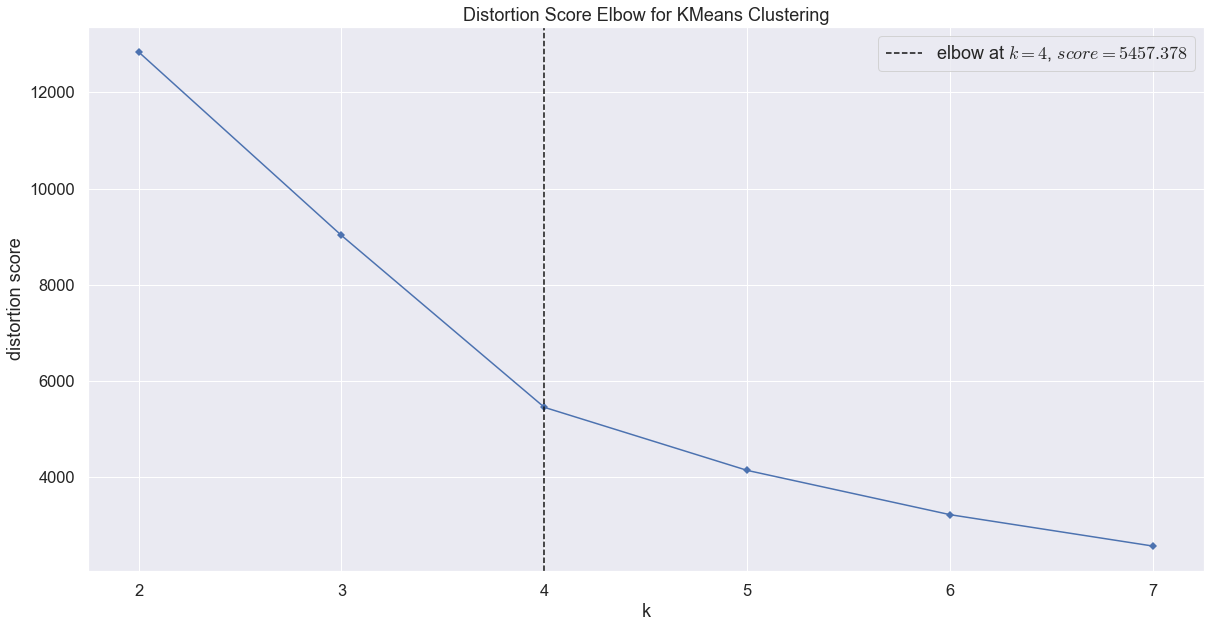

In [114]:
# WSS
kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();

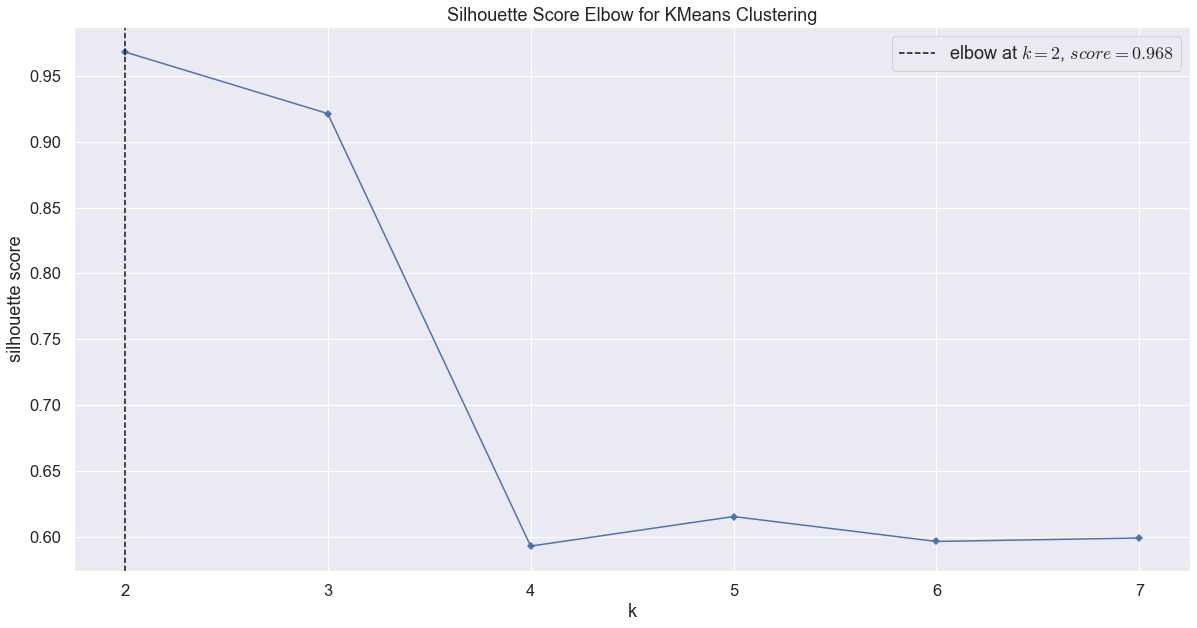

In [115]:
# SS
kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();

## Silhouette Analysis

In [116]:
# == note reminder
# divmod input are numerator and denominator
# divmod output are quotient and remainder
# example:
x, y = divmod(5,2)
print(x, y)

2 1


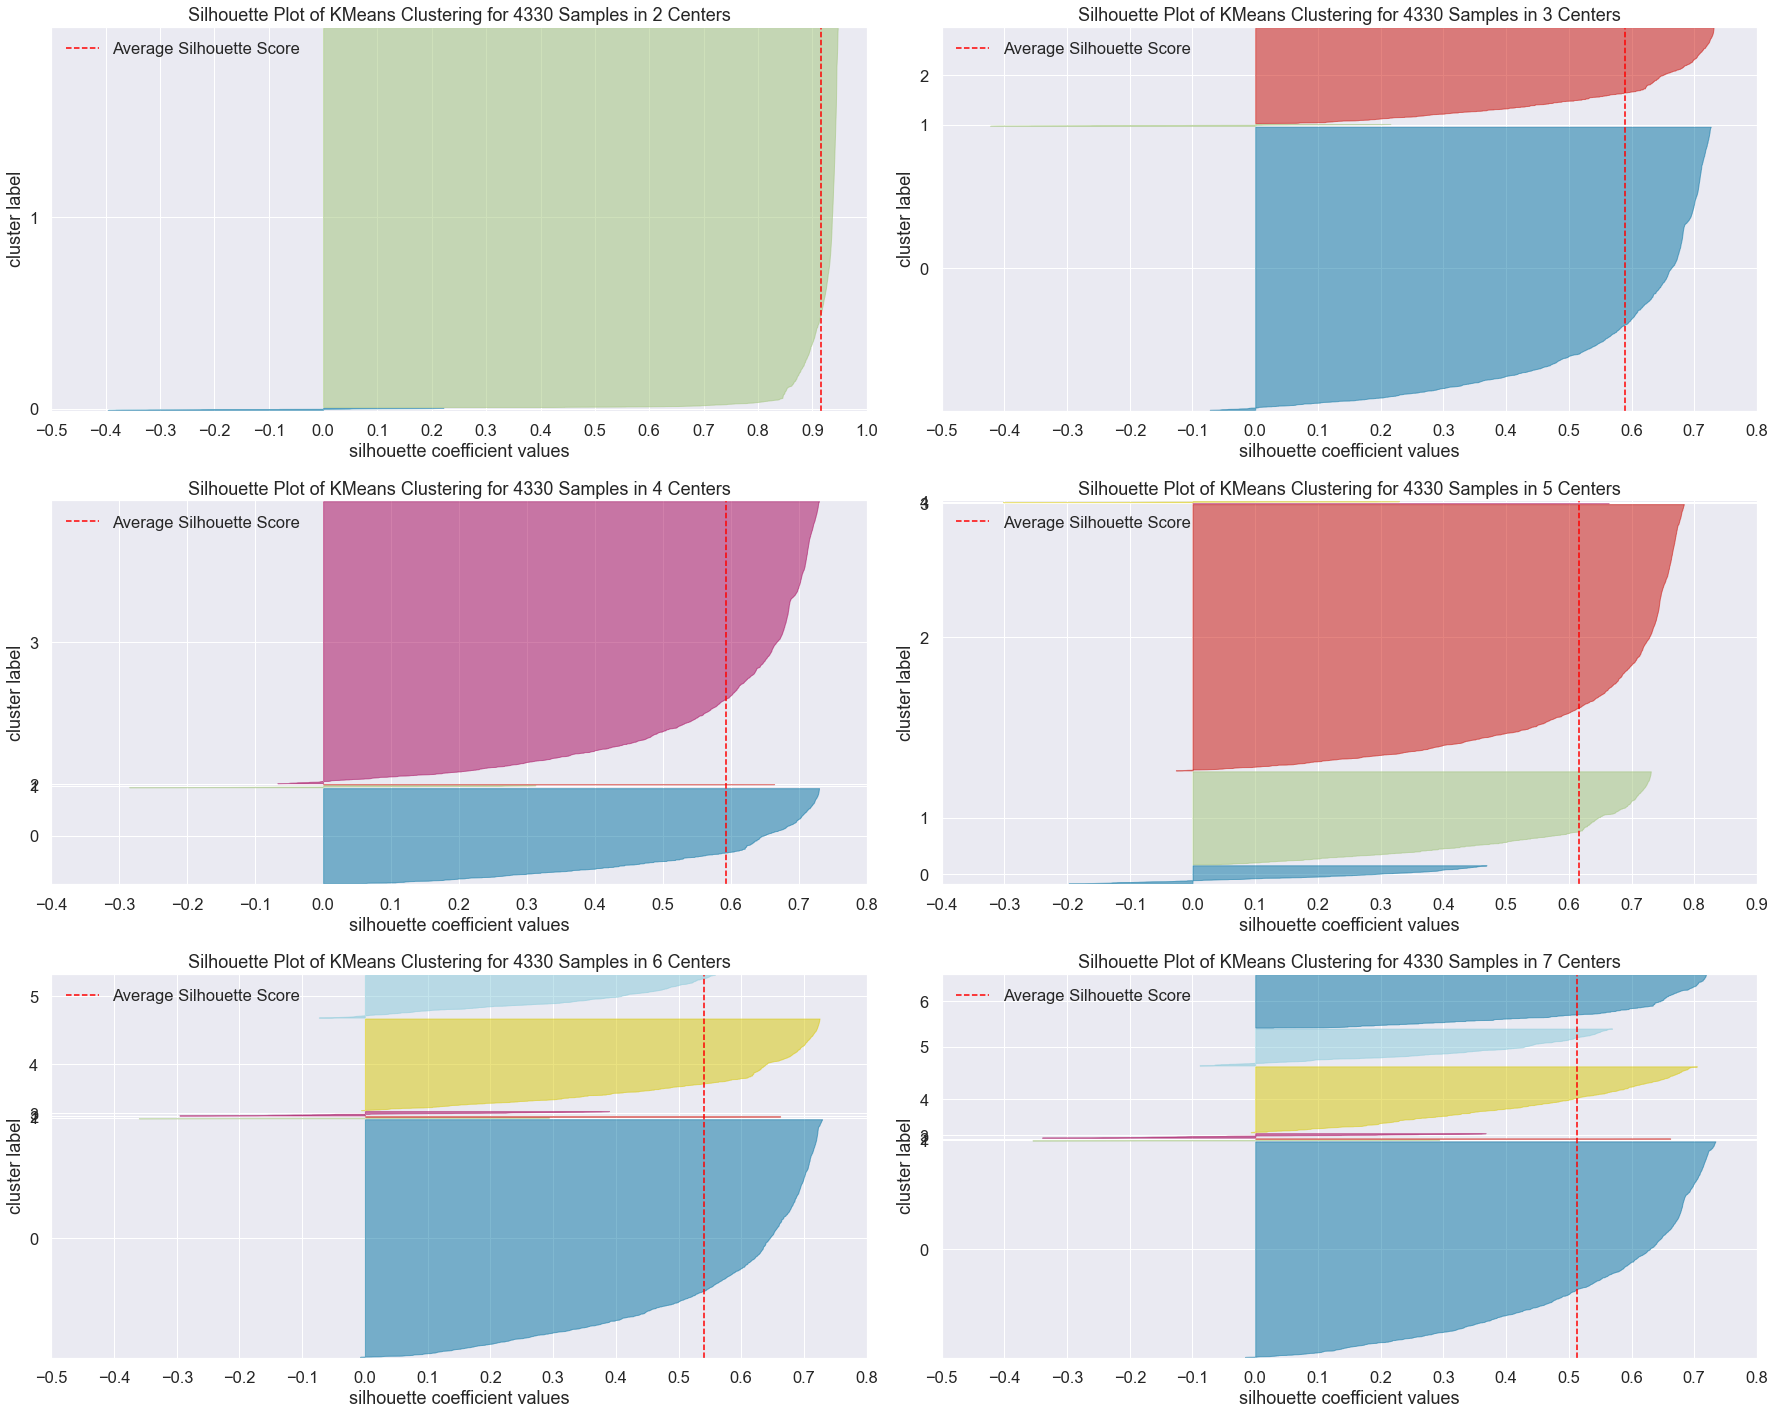

In [117]:
fig, ax = plt.subplots(3,2, figsize=(25,20))


for k in clusters:
    km = c.KMeans (n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, r = divmod(k,2) # quotient and remainder will determine plot position
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][r])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()
    
personal_settings()

# Model training

In [256]:
#df9 = df8.copy()

## K-Means

In [118]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# model clustering
# labels = kmeans.predict(X) # another way
labels = kmeans.labels_
print(labels)

[1 0 0 ... 0 0 0]


## Cluster Validation

In [119]:
# WSS 
print('WSS value: {}'.format(kmeans.inertia_))

# SS 
print('SS value:  {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 9404.844768603278


AttributeError: 'DataFrame' object has no attribute 'silhouette_score'

# Cluster Analysis

In [120]:
df10=df7.copy()
df10['clusters'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,clusters
0,17850,0.38,2.79,3.89,-0.03,1
1,13047,0.14,-0.36,0.62,-0.03,0
2,12583,0.52,-0.90,1.41,-0.03,0
3,13748,-0.12,0.03,0.10,-0.02,0
4,15100,-0.13,2.40,-0.16,0.15,1


## Visualization Inspection

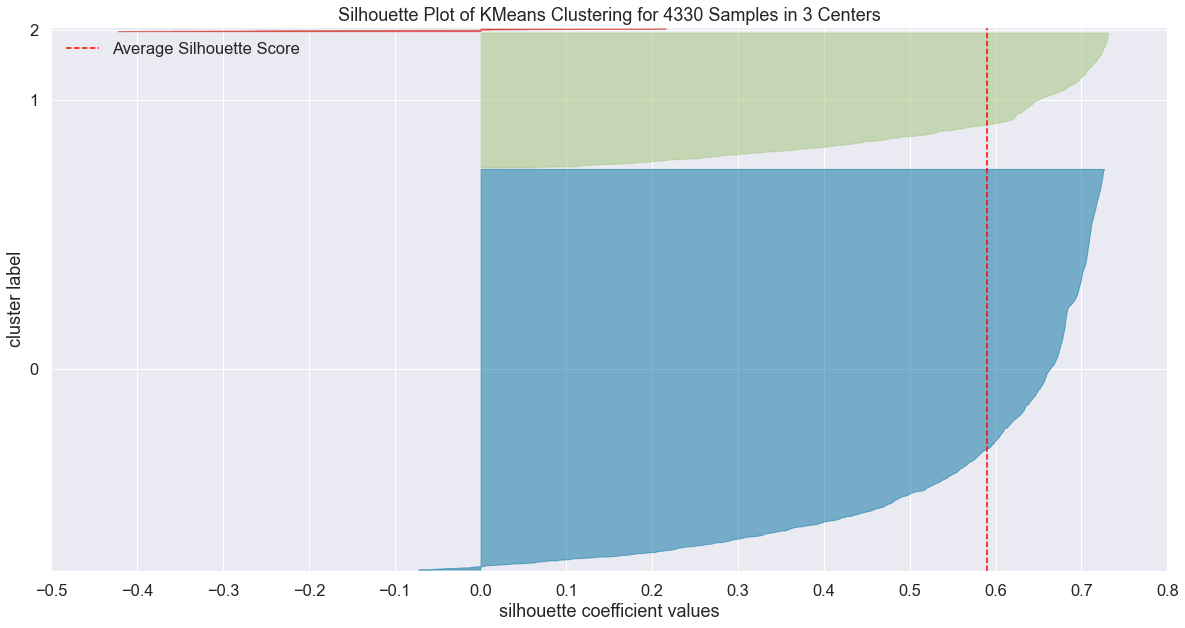

In [121]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 2D Plot

In [122]:
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,clusters
0,17850,0.38,2.79,3.89,-0.03,1
1,13047,0.14,-0.36,0.62,-0.03,0
2,12583,0.52,-0.90,1.41,-0.03,0
3,13748,-0.12,0.03,0.10,-0.02,0
4,15100,-0.13,2.40,-0.16,0.15,1


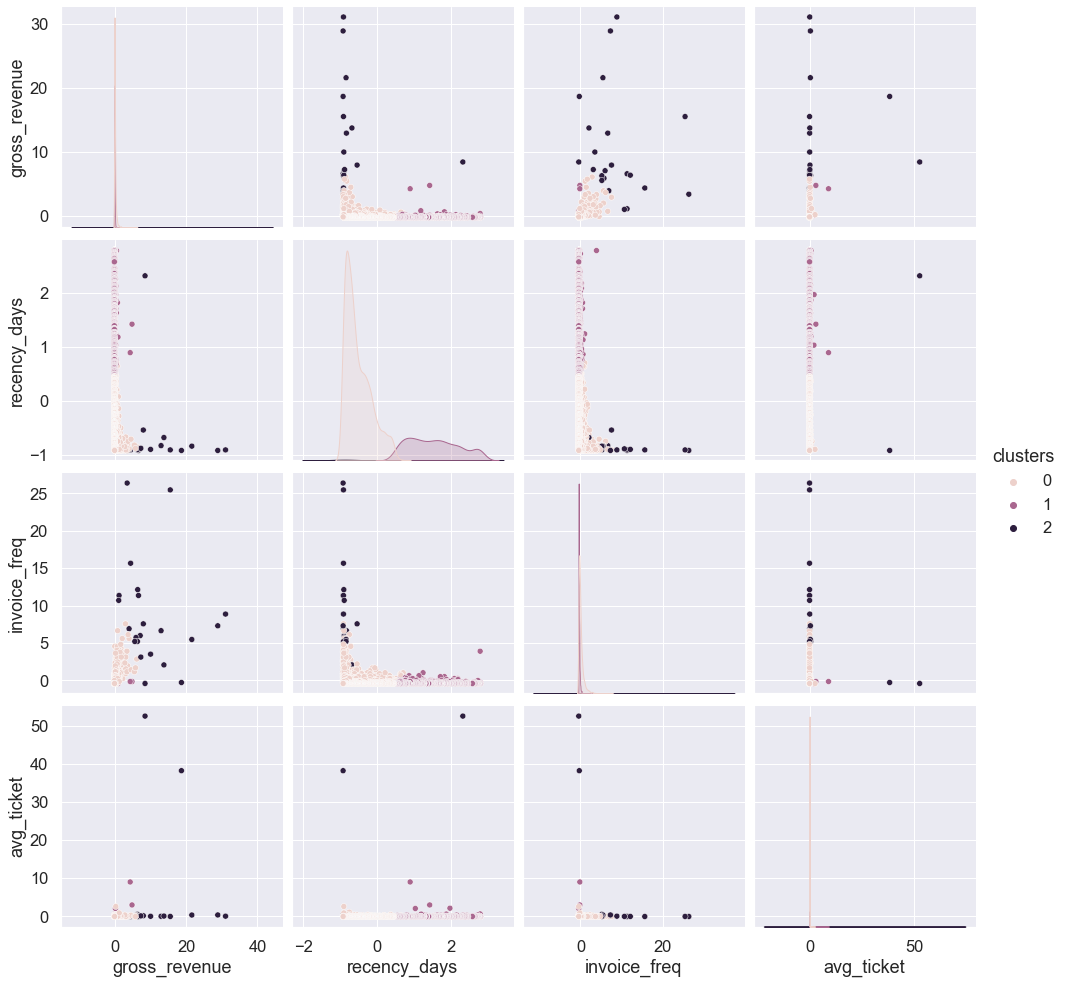

In [123]:
df_viz = df10.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='clusters', height=3.5);

## UMAP

In [124]:
X.head() # X = df_ref without 'customer_id' column

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0.38,2.79,3.89,-0.03
1,0.14,-0.36,0.62,-0.03
2,0.52,-0.90,1.41,-0.03
3,-0.12,0.03,0.10,-0.02
4,-0.13,2.40,-0.16,0.15


In [125]:
# reducing high dimensionality
reducer = umap.UMAP(n_neighbors=40, random_state=42) # n_neighbors changes clusteres visualization, kind of "zoom in/zoom out"

# projected space
embedding = reducer.fit_transform(X)

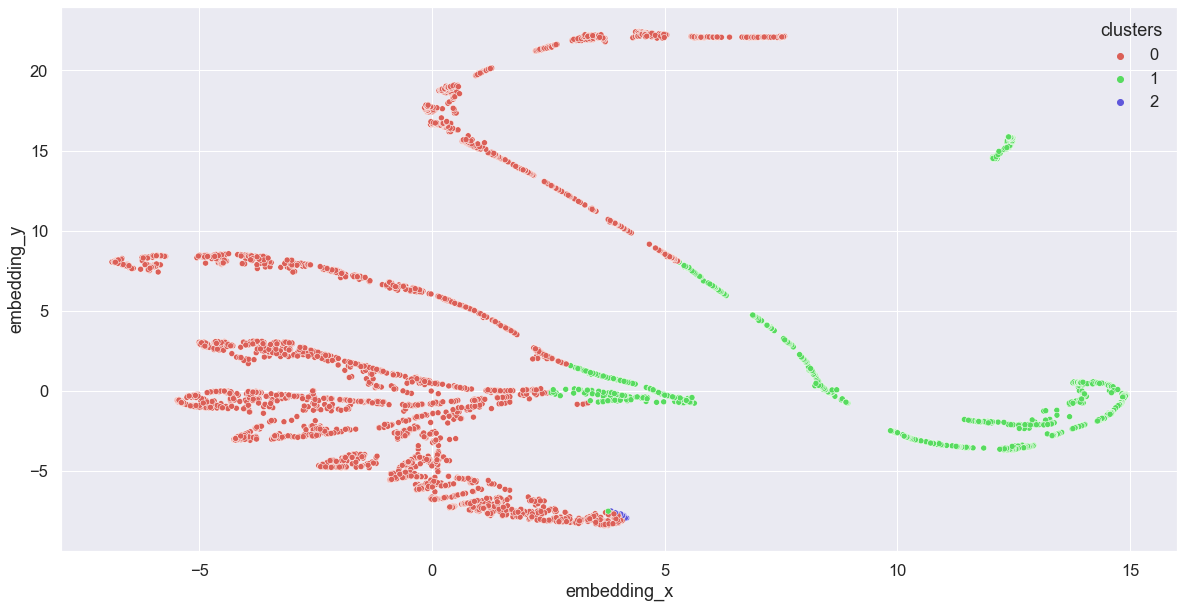

In [126]:
# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='clusters',
                palette=sns.color_palette('hls', n_colors=len(df_viz['clusters'].unique())),
                data=df_viz);

## Cluster Profile

In [127]:
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,clusters
0,17850,0.38,2.79,3.89,-0.03,1
1,13047,0.14,-0.36,0.62,-0.03,0
2,12583,0.52,-0.90,1.41,-0.03,0
3,13748,-0.12,0.03,0.10,-0.02,0
4,15100,-0.13,2.40,-0.16,0.15,1


In [128]:
# number of customers on each cluster
df_cluster = df10[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['customer_percentage'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# avg gross_revenue
df_avg_grossrevenue = df10[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_grossrevenue, how='inner', on='clusters')

# avg recency_days
df_avg_recencydays = df10[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recencydays, how='inner', on='clusters')

# avg incoive_freq
df_avg_invoicefreq = df10[['invoice_freq','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoicefreq, how='inner', on='clusters')

# avg ticket
df_avg_ticket = df10[['avg_ticket','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='clusters')

df_cluster.sort_values('gross_revenue', ascending=False)

,clusters,customer_id,customer_percentage,gross_revenue,recency_days,invoice_freq,avg_ticket
2,2,22,0.51,10.34,-0.72,8.44,4.19
0,0,3222,74.41,-0.02,-0.51,0.06,-0.03
1,1,1086,25.08,-0.16,1.54,-0.35,-0.01


### <font color=red> Cluster 00:  Insiders
    - Number of Customers:: 6 (0.14% of total of customers)
    - Avg Recency Days: 7 
    - Avg Quantity of Invoices: 89
    - Avg Gross Revenue: $182,181.98	
        
###  <font color=red> Cluster 01:
    - Number of Customers: 28 (0.64% of total of customers)
    - Avg Recency Days: 6
    - Avg Quantity of Invoices: 58
    - Avg Gross Revenue: $42,614.39
    
###  <font color=red> Cluster 03:
    - Number of Customers: 267 (6.11% of total of customers)
    - Avg Recency Days: 20
    - Avg Quantity of Invoices: 20
    - Avg Gross Revenue: $8,089.03

### <font color=red>  Cluster 02:
    - Number of Customers: 4.071 (93,12% of total of customers)
    - Avg Recency Days: 97
    - Avg Quantity of Invoices: 4
    - Avg Gross Revenue: $946.70

# Deploy to Production